# Case study - HappyCustomerBank

### Opis problemu i danych:

About Company

Happy Customer Bank is a mid-sized private bank which deals in all kinds of loans. They have presence across all major cities in India and focus on lending products. They have a digital arm which sources customers from the internet.


Problem

Digital arms of banks today face challenges with lead conversion, they source leads through mediums like search, display, email campaigns and via affiliate partners. Here Happy Customer Bank faces same challenge of low conversion ratio. They have given a problem to identify the customers segments having higher conversion ratio for a specific loan product so that they can specifically target these customers, here they have provided a partial data set for salaried customers only from the last 3 months. They also capture basic details about customers like gender, DOB, existing EMI, employer Name, Loan Amount Required, Monthly Income, City, Interaction data and many others. Let’s look at the process at Happy Customer Bank.

In above process, customer applications can drop majorly at two stages, at login and approval/ rejection by bank. Here we need to identify the segment of customers having higher disbursal rate in next 30 days.

Data Set

We have train and test data set, train data set has both input and output variable(s). Need to predict probability of disbursal for test data set.


Input variables:

- ID - Unique ID (can not be used for predictions)
- Gender- Sex
- City - Current City
- Monthly_Income - Monthly Income in rupees
- DOB - Date of Birth
- Lead_Creation_Date - Lead Created on date
- Loan_Amount_Applied - Loan Amount Requested (INR)
- Loan_Tenure_Applied - Loan Tenure Requested (in years)
- Existing_EMI - EMI of Existing Loans (INR)
- Employer_Name - Employer Name
- Salary_Account- Salary account with Bank
- Mobile_Verified - Mobile Verified (Y/N)
- Var5- Continuous classified variable
- Var1- Categorical variable with multiple levels
- Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility
- Loan_Tenure_Submitted- Loan Tenure Revised and Selected after seeing Eligibility (Years)
- Interest_Rate- Interest Rate of Submitted Loan Amount
- Processing_Fee- Processing Fee of Submitted Loan Amount (INR)
- EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)
- Filled_Form- Filled Application form post quote
- Device_Type- Device from which application was made (Browser/ Mobile)
- Var2- Categorical Variable with multiple Levels
- Source- Categorical Variable with multiple Levels
- Var4- Categorical Variable with multiple Levels

Outcomes:

- LoggedIn- Application Logged (Variable for understanding the problem – cannot be used in prediction)
- Disbursed- Loan Disbursed (Target Variable)

Źródło:

https://discuss.analyticsvidhya.com/t/hackathon-3-x-predict-customer-worth-for-happy-customer-bank/3802

### Interesują nas dwie miary jakości rozwiązania: 
- AUC
- Zysk, liczony w następujący sposób:

  - zaklasyfikowanie obserwacji jako 1 kosztuje nas 100 zł (tzn. nasz model przypisuje obserwacji klasę 1),
  - trafienie predykcją w klasę 1 przynosi nam 1000 zł zarobku.

Cel: osiągnąć jak największy zysk.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1. Data preparation

In [2]:
data_train = pd.read_csv('Dane/HappyCustomerBank/Train_nyOWmfK.csv', encoding="latin1")
data_test = pd.read_csv('Dane/HappyCustomerBank/Test_bCtAN1w.csv', encoding="latin1")

In [3]:
data_train.shape

(87020, 26)

In [4]:
data_test.shape

(37717, 24)

Concat train set and test set for further analysis. 

In [5]:
data_test['Disbursed'] = np.nan

In [6]:
data = pd.concat([data_train, data_test], axis=0, sort=False)

In [7]:
data.drop('ID', inplace=True, axis=1)

In [8]:
data.drop('LoggedIn', inplace=True, axis=1)

In [9]:
data.shape

(124737, 24)

In [10]:
data.head(2).T

,0,1
Gender,Female,Male
City,Delhi,Mumbai
Monthly_Income,20000,35000
DOB,23-May-78,07-Oct-85
Lead_Creation_Date,15-May-15,04-May-15
Loan_Amount_Applied,300000,200000
Loan_Tenure_Applied,5,2
Existing_EMI,0,0
Employer_Name,CYBOSOL,TATA CONSULTANCY SERVICES LTD (TCS)
Salary_Account,HDFC Bank,ICICI Bank


## 2. Exploratory Data Analysis

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124737 entries, 0 to 37716
Data columns (total 24 columns):
Gender                   124737 non-null object
City                     123336 non-null object
Monthly_Income           124737 non-null int64
DOB                      124737 non-null object
Lead_Creation_Date       124737 non-null object
Loan_Amount_Applied      124626 non-null float64
Loan_Tenure_Applied      124626 non-null float64
Existing_EMI             124626 non-null float64
Employer_Name            124624 non-null object
Salary_Account           107936 non-null object
Mobile_Verified          124737 non-null object
Var5                     124737 non-null int64
Var1                     124737 non-null object
Loan_Amount_Submitted    75202 non-null float64
Loan_Tenure_Submitted    75202 non-null float64
Interest_Rate            39836 non-null float64
Processing_Fee           39391 non-null float64
EMI_Loan_Submitted       39836 non-null float64
Filled_Form              

In [12]:
data.isna().sum()

Gender                       0
City                      1401
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied        111
Loan_Tenure_Applied        111
Existing_EMI               111
Employer_Name              113
Salary_Account           16801
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    49535
Loan_Tenure_Submitted    49535
Interest_Rate            84901
Processing_Fee           85346
EMI_Loan_Submitted       84901
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
Disbursed                37717
dtype: int64

Target variable: **Disbursed**

In [13]:
disbursed_counts = data['Disbursed'].value_counts()

In [14]:
disbursed_counts

0.0    85747
1.0     1273
Name: Disbursed, dtype: int64

In [15]:
disbursed_counts[0] / disbursed_counts[1]

67.35820895522389

Target classes are highly imbalanced (label [0] is about 67 times more frequent than label [1]).

In [16]:
# The list below will store concecutive feature names treated as categorical ones during analysis
CATEGORICAL_FEATURES = []

Variable: **Gender**

In [17]:
data['Gender'].isna().sum()

0

In [18]:
data['Gender'].value_counts()

Male      71398
Female    53339
Name: Gender, dtype: int64

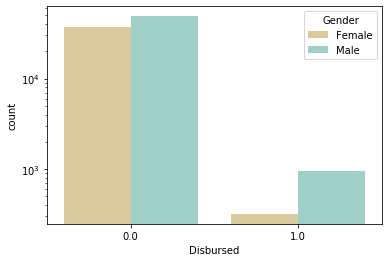

In [19]:
sns.countplot(x="Disbursed", hue="Gender", data=data, palette='BrBG')
plt.yscale('log')

In [20]:
CATEGORICAL_FEATURES.append('Gender')

Variable:  **City**

In [21]:
data['City'].isna().sum()

1401

We can fill misssing values with "NotGiven" category. 

In [22]:
data['City'].fillna('NotGiven', inplace=True)

In [23]:
data.City.value_counts()

Delhi          17936
Bengaluru      15522
Mumbai         15425
Hyderabad      10410
Chennai         9895
               ...  
Lohit              1
Mainpuri           1
GANDEVI            1
Bandipore          1
Lakshadweep        1
Name: City, Length: 724, dtype: int64

One of possible approaches is to create separate categories for most popular cities, putting the rest of samples into "Other" category.

In [24]:
data.City.value_counts().iloc[:15]

Delhi         17936
Bengaluru     15522
Mumbai        15425
Hyderabad     10410
Chennai        9895
Pune           7427
Kolkata        4282
Ahmedabad      2528
Jaipur         1892
Gurgaon        1743
Coimbatore     1659
NotGiven       1401
Thane          1306
Chandigarh     1266
Surat          1149
Name: City, dtype: int64

In [25]:
frequent_cities = data.City.value_counts().index[:15]

In [26]:
frequent_cities

Index(['Delhi', 'Bengaluru', 'Mumbai', 'Hyderabad', 'Chennai', 'Pune',
       'Kolkata', 'Ahmedabad', 'Jaipur', 'Gurgaon', 'Coimbatore', 'NotGiven',
       'Thane', 'Chandigarh', 'Surat'],
      dtype='object')

In [27]:
def convert_city(city):
    if city in frequent_cities:
        return city
    else:
        return "Other"
    
data["City"] = data.City.apply(convert_city)

In [28]:
CATEGORICAL_FEATURES.append('City')

Variable: **Monthly_Income**

In [29]:
data['Monthly_Income'].isna().sum()

0

In [30]:
data['Monthly_Income'].describe()

count    1.247370e+05
mean     5.309073e+04
std      1.823394e+06
min      0.000000e+00
25%      1.650000e+04
50%      2.500000e+04
75%      4.000000e+04
max      4.445544e+08
Name: Monthly_Income, dtype: float64

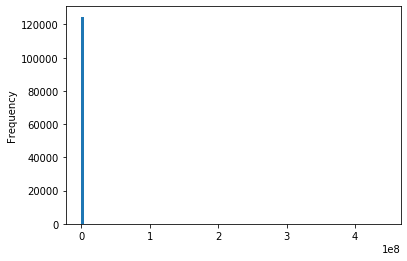

In [31]:
data['Monthly_Income'].plot.hist(bins=100)

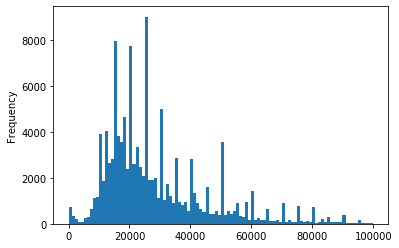

In [32]:
data[data['Monthly_Income'] < 10e4]['Monthly_Income'].plot.hist(bins=100)

This variable has a skewed distribution. In order to handle such a big range of skewed values, we can introduce logarithmic transformation as additional feature for classifictaion. 

In [33]:
data['Monthly_Income_Log'] = np.log10(data['Monthly_Income'] + 1)

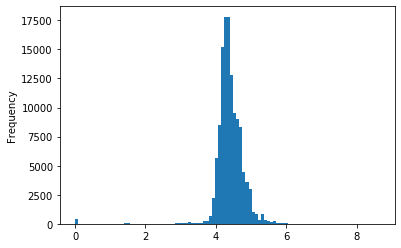

In [34]:
data['Monthly_Income_Log'].plot.hist(bins=100)

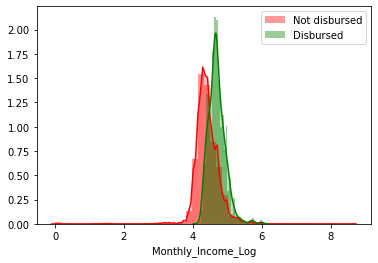

In [35]:
sns.distplot(data[data['Disbursed'] == 0]['Monthly_Income_Log'], hist=True, color="r", kde_kws={"shade": True}, label='Not disbursed')
sns.distplot(data[data['Disbursed'] == 1]['Monthly_Income_Log'], hist=True, color="g", kde_kws={"shade": True}, label='Disbursed')
plt.legend()

Variable: **DOB**

In [36]:
data['DOB'].isna().sum()

0

Assuming that dataset was composed in 2015, we can estimate age of the client. The rest of information stored in this variable can be dropped.

In [37]:
data['Age'] = data.DOB.apply(lambda dt: 2015 - (1900 + int(dt[-2:])))

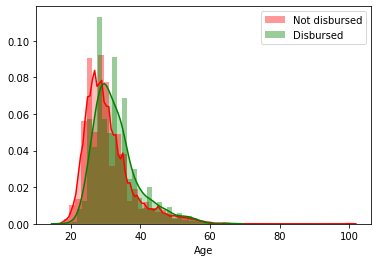

In [38]:
sns.distplot(data[data['Disbursed'] == 0]['Age'], hist=True, color="r", kde_kws={"shade": True}, label='Not disbursed')
sns.distplot(data[data['Disbursed'] == 1]['Age'], hist=True, color="g", kde_kws={"shade": True}, label='Disbursed')
plt.legend()

In [39]:
data.drop('DOB', inplace=True, axis=1)

Variable: **Lead_Creation_Date**

In [40]:
data['Lead_Creation_Date'].isna().sum()

0

In [41]:
data.Lead_Creation_Date.apply(lambda dt: dt[-2:]).unique()

array(['15'], dtype=object)

All operations were made in 2015, therefore year won't help predict target value. We can decide to store information about month of lead creation date.

In [42]:
data['Lead_Creation_Month'] = data.Lead_Creation_Date.apply(lambda dt: dt[3:-3])

In [43]:
data['Lead_Creation_Month'].unique()

array(['May', 'Jun', 'Jul'], dtype=object)

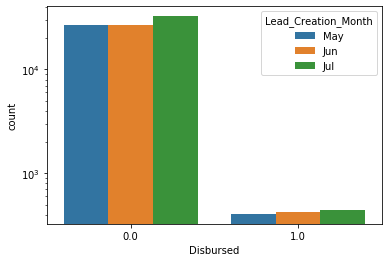

In [44]:
sns.countplot(x="Disbursed", hue="Lead_Creation_Month", data=data)
plt.yscale('log')

In [45]:
data.drop('Lead_Creation_Date', inplace=True, axis=1)

In [46]:
CATEGORICAL_FEATURES.append('Lead_Creation_Month')

Variable: **Loan_Amount_Applied**

In [47]:
data['Loan_Amount_Applied'].isna().sum()

111

In [48]:
data.Loan_Amount_Applied.value_counts()

0.0         41314
100000.0    20627
200000.0    18705
300000.0    14334
500000.0    13905
            ...  
89000.0         1
486287.0        1
223241.0        1
243000.0        1
33000.0         1
Name: Loan_Amount_Applied, Length: 320, dtype: int64

We can aggregate 41314 zeros and 111 missing values into one feature called "Missing_Loan_Amount_Applied".

In [49]:
data['Missing_Loan_Amount_Applied'] = data.Loan_Amount_Applied.isna() | (data.Loan_Amount_Applied == 0.0)

Missing values can be raplaced either by zeros (as most frequent value) or more sophisticated staticsics (like median sampling from distribution). In this case they will be replaced by zeros.

In [50]:
data.loc[data.Loan_Amount_Applied.isna(), 'Loan_Amount_Applied'] = 0.0

In [51]:
CATEGORICAL_FEATURES.append('Missing_Loan_Amount_Applied')

Variable: **Loan_Tenure_Applied**

In [52]:
data['Loan_Tenure_Applied'].isna().sum()

111

In [53]:
data.Loan_Tenure_Applied.value_counts()

0.0     48380
5.0     27464
3.0     18800
2.0     13490
4.0      9556
1.0      6864
10.0       61
7.0         6
6.0         3
9.0         1
8.0         1
Name: Loan_Tenure_Applied, dtype: int64

The same strategy as with Loan_Amount_Applied.

In [54]:
data['Missing_Loan_Tenure_Applied'] = data.Loan_Tenure_Applied.isna() | (data.Loan_Tenure_Applied == 0.0)

In [55]:
data.loc[data.Loan_Tenure_Applied.isna(), 'Loan_Tenure_Applied'] = 0.0

In [56]:
CATEGORICAL_FEATURES.append('Missing_Loan_Tenure_Applied')

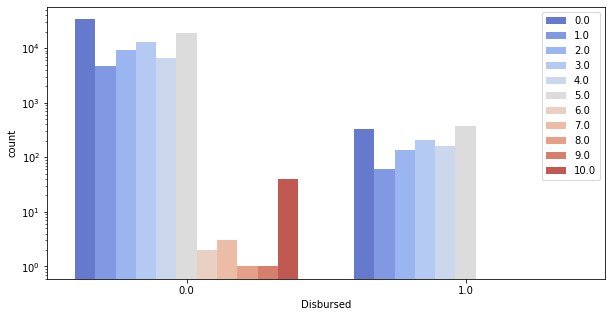

In [57]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Disbursed", hue="Loan_Tenure_Applied", data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc='upper right')

Variable: **Existing_EMI**

In [58]:
data['Existing_EMI'].isna().sum()

111

In [59]:
data.Existing_EMI.value_counts()

0.0        83452
5000.0      3806
10000.0     2516
3000.0      2195
4000.0      1780
           ...  
9387.0         1
11434.0        1
13481.0        1
27250.0        1
3005.0         1
Name: Existing_EMI, Length: 4704, dtype: int64

The same strategy as with Loan_Amount_Applied and Loan_Tenure_Applied.

In [60]:
data['Missing_Existing_EMI'] = data.Loan_Tenure_Applied.isna() | (data.Loan_Tenure_Applied == 0.0)

In [61]:
data.loc[data.Existing_EMI.isna(), 'Existing_EMI'] = 0.0

In [62]:
CATEGORICAL_FEATURES.append('Missing_Existing_EMI')

Variable: **Employer_Name**

In [63]:
data['Employer_Name'].isna().sum()

113

In [64]:
data['Employer_Name'].value_counts()

0                                               6900
TATA CONSULTANCY SERVICES LTD (TCS)              754
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     558
ACCENTURE SERVICES PVT LTD                       476
GOOGLE                                           408
                                                ... 
ARVIND LIFESTYLE BRANDS PVT LTD                    1
EMPLOYEES STATE INS CORPORATION                    1
UP HEALTH                                          1
RELIANACE GENERAL INSURANACE                       1
ANNARITA COUTO                                     1
Name: Employer_Name, Length: 57193, dtype: int64

We can replace missing values and zeros with "Other" field. 

In [65]:
data.loc[data.Employer_Name.isna() | (data.Employer_Name == '0'), 'Employer_Name'] = 'NotGiven'

In [66]:
data['Employer_Name'].value_counts()

NotGiven                                        7013
TATA CONSULTANCY SERVICES LTD (TCS)              754
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     558
ACCENTURE SERVICES PVT LTD                       476
GOOGLE                                           408
                                                ... 
ARVIND LIFESTYLE BRANDS PVT LTD                    1
EMPLOYEES STATE INS CORPORATION                    1
UP HEALTH                                          1
RELIANACE GENERAL INSURANACE                       1
ANNARITA COUTO                                     1
Name: Employer_Name, Length: 57193, dtype: int64

We are still left with over 57k unique values. One of possible options is to group values by their mean **Disbursed** score and split them into few buckets.

In [67]:
employer_means = data_train.groupby('Employer_Name')['Disbursed'].mean()

In [68]:
np.mean(np.array([1, 2, 3, np.nan]))

nan

In [69]:
employer_means

Employer_Name
                                                                                                           0.0
                                                                                                           0.0
                                                                                                           0.0
  ADLER MEDIEQUIP PVT LTD                                                                                  0.0
  MN&C SUPPLY LINKS RETAIL PVT. LTD                                                                        0.0
                                                                                                          ... 
burger king india pvt ltd                                                                                  0.0
ordnante factory                                                                                           0.0
other                                                                                             

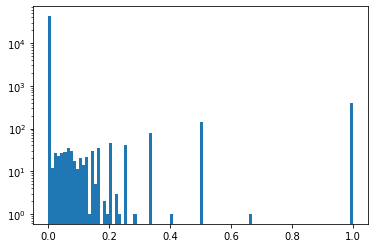

In [70]:
plt.hist(employer_means.values, bins=100)
plt.yscale('log')

In [71]:
mapping_dict = dict(pd.cut(employer_means[employer_means.index != 'NotGiven'], 5, labels=range(5)))

In [72]:
mapping_dict

{' ': 0,
 '  ': 0,
 '    ': 0,
 '  ADLER MEDIEQUIP PVT LTD': 0,
 '  MN&C SUPPLY LINKS RETAIL PVT. LTD': 0,
 '  RAJSHREE SUGARS CHEMICALS LTD': 0,
 ' 6 IR BATTALION': 0,
 ' A O SMITH': 0,
 ' AASHISH SURENDRA SHUKLA ': 0,
 ' AMAZON DEVELOPMENT CENTER INDIA PVT LTD': 0,
 ' ANI TECHNOLOGIES': 0,
 ' APPU STEEL  FURNICHER': 0,
 ' ASCENT STAFFING SOLUTIONS PRIVATE LIMITED': 0,
 ' BASE INFORMATION MANAGEMENT PVT LTD': 0,
 ' C G MARKETING ': 0,
 ' C INDRA SENA REDDY': 0,
 ' CAPITAL GROUP MIDLAND CREDIT MANAGEMENT INDIA PVT LTD': 0,
 ' CHARKU SAHU': 0,
 ' CTA APPARELS PVT LTD': 0,
 ' DELHI DISASTER MANAGEMENT AUTHORITY': 0,
 ' DINESH YADAV': 0,
 ' DIVYA NEXTGEN ENGICON PVT LTD': 0,
 ' EDUCATION DEPARTMENT': 0,
 ' EDUCATION DEPT.': 0,
 ' G H RAISONI POLYTECHNC': 0,
 ' GEETA DAS': 0,
 ' GKFSPL': 0,
 ' GOVERNMENT JOB': 0,
 ' GOVT CONTRACT': 0,
 ' GOVT OF INDIA': 0,
 ' GOVT. OF ODISHA': 0,
 ' GRANTEBAL HIGHSCHOOL KOLHAPUR': 0,
 ' HANUMAN MAHADEV GAURAV': 0,
 ' HARISH H K ': 0,
 ' INDIAN ARMY': 0,
 '

In [73]:
def convert_employer(employer):
    if employer in mapping_dict.keys():
        return mapping_dict[employer]
    elif employer == 'NotGiven':
        return employer
    else:
        return "Other"
    
data["Employer_Name"] = data.Employer_Name.apply(convert_employer)

In [74]:
data['Employer_Name'].value_counts()

0           101712
Other        14517
NotGiven      7013
1              649
4              454
2              389
3                3
Name: Employer_Name, dtype: int64

In [75]:
CATEGORICAL_FEATURES.append('Employer_Name')

Variable: **Salary_Account**

In [76]:
data['Salary_Account'].isna().sum()

16801

In [77]:
data['Salary_Account'].value_counts()

HDFC Bank                                          25180
ICICI Bank                                         19547
State Bank of India                                17110
Axis Bank                                          12590
Citibank                                            3398
Kotak Bank                                          2955
IDBI Bank                                           2213
Punjab National Bank                                1747
Bank of India                                       1713
Bank of Baroda                                      1675
Standard Chartered Bank                             1434
Canara Bank                                         1385
Union Bank of India                                 1330
Yes Bank                                            1120
ING Vysya                                            996
Corporation bank                                     948
Indian Overseas Bank                                 901
State Bank of Hyderabad        

Similiary to the **Employer_Name** variable, we can encapsulate less frequent banks into larger groups by their mean **Disbursed** score.

But first, we need to fill missing values, e.g. by random sampling from existing values.

In [78]:
import random
mask = data['Salary_Account'].isnull()
samples = random.choices(data['Salary_Account'][~mask].values , k=mask.sum())
data.loc[mask, 'Salary_Account'] = samples

In [79]:
data['Salary_Account'].isna().sum()

0

In [80]:
account_means = data_train.groupby('Salary_Account')['Disbursed'].mean()

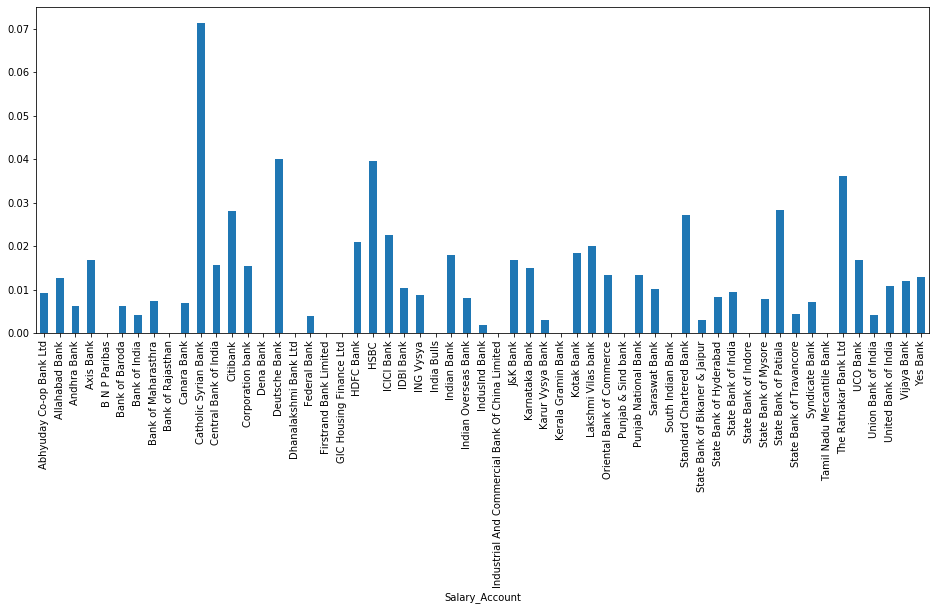

In [81]:
account_means.plot.bar(figsize=(16, 6))

In [82]:
mapping_dict = dict(pd.cut(account_means[(account_means.index != 'HDFC Bank') & 
                                         (account_means.index != 'ICICI Bank') &
                                         (account_means.index != 'State Bank of India') & 
                                         (account_means.index != 'Axis Bank')], 5, labels=range(5)))

In [83]:
def convert_account(account):
    if account in mapping_dict.keys():
        return mapping_dict[account]
    elif account in ['HDFC Bank', 'ICICI Bank', 'State Bank of India', 'Axis Bank']:
        return account
    else:
        return "Other"
    
data["Salary_Account"] = data.Salary_Account.apply(convert_account)

In [84]:
CATEGORICAL_FEATURES.append("Salary_Account")

Variable: **Mobile_Verified**

In [85]:
data['Mobile_Verified'].isna().sum()

0

In [86]:
data['Mobile_Verified'].value_counts()

Y    80928
N    43809
Name: Mobile_Verified, dtype: int64

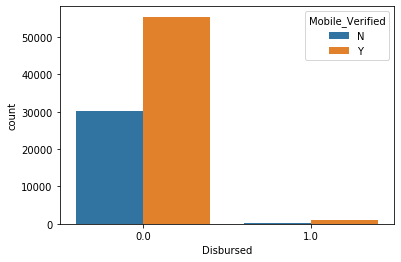

In [87]:
sns.countplot(x="Disbursed", hue="Mobile_Verified", data=data)

In [88]:
CATEGORICAL_FEATURES.append("Mobile_Verified")

Variable: **Var1**

In [89]:
data['Var1'].isna().sum()

0

In [90]:
data['Var1'].value_counts()

HBXX    84901
HBXC    12952
HBXB     6502
HAXA     4214
HBXA     3042
HAXB     2879
HBXD     2818
HAXC     2171
HBXH     1387
HCXF      990
HAYT      710
HAVC      570
HAXM      386
HCXD      348
HCYS      318
HVYS      252
HAZD      161
HCXG      114
HAXF       22
Name: Var1, dtype: int64

Similiary to the **Employer_Name** variable, we can encapsulate less frequent categories into larger groups by their mean **Disbursed** score.


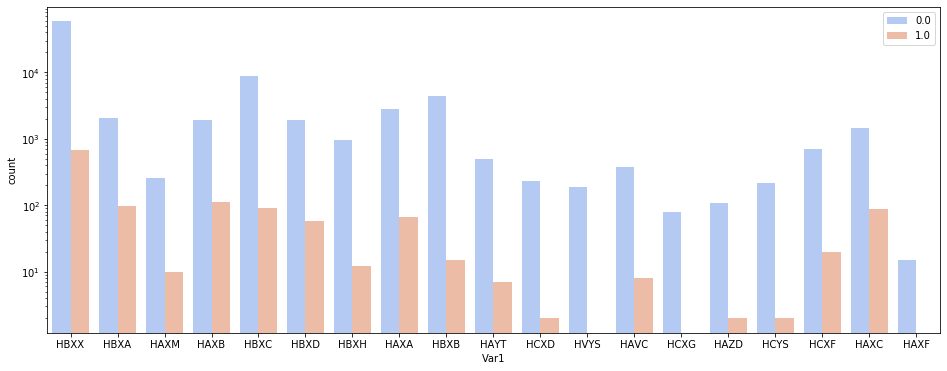

In [91]:
plt.figure(figsize=(16, 6))
sns.countplot(x="Var1", hue="Disbursed", data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc='upper right')

In [92]:
var1_means = data_train.groupby('Var1')['Disbursed'].mean()

In [93]:
mapping_dict = dict(pd.cut(var1_means[var1_means.index != 'HBXX'], 5, labels=range(5)))

In [94]:
mapping_dict

{'HAVC': 1,
 'HAXA': 2,
 'HAXB': 4,
 'HAXC': 4,
 'HAXF': 0,
 'HAXM': 3,
 'HAYT': 1,
 'HAZD': 1,
 'HBXA': 4,
 'HBXB': 0,
 'HBXC': 0,
 'HBXD': 2,
 'HBXH': 1,
 'HCXD': 0,
 'HCXF': 2,
 'HCXG': 0,
 'HCYS': 0,
 'HVYS': 0}

In [95]:
def convert_var1(var1):
    if var1 in mapping_dict.keys():
        return mapping_dict[var1]
    else:
        return "Other"
    
data["Var1"] = data.Var1.apply(convert_var1)

In [96]:
CATEGORICAL_FEATURES.append("Var1")

Variable: **Var2**

In [97]:
data['Var2'].isna().sum()

0

In [98]:
data['Var2'].value_counts()

B    53481
G    47338
C    20366
E     1855
D      918
F      770
A        9
Name: Var2, dtype: int64

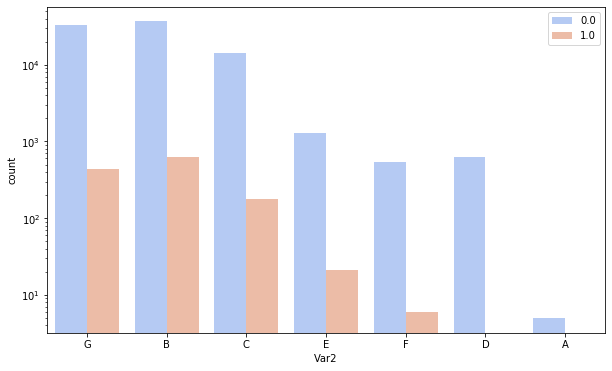

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Var2", hue="Disbursed", data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc='upper right')

In [100]:
CATEGORICAL_FEATURES.append("Var2")

Variable: **Var4**

In [101]:
data['Var4'].isna().sum()

0

In [102]:
data['Var4'].value_counts()

3    36280
1    34316
5    29092
4     9411
2     8481
0     3564
7     3264
6      329
Name: Var4, dtype: int64

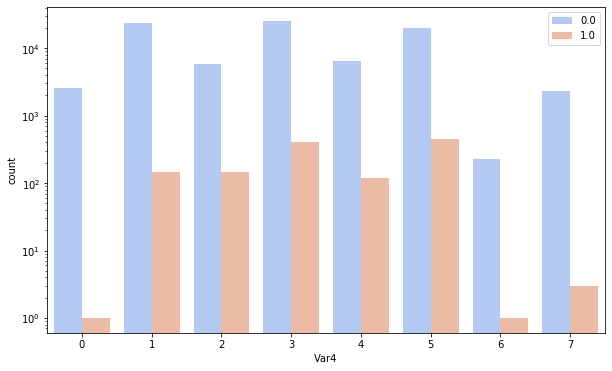

In [103]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Var4", hue="Disbursed", data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc='upper right')

In [104]:
CATEGORICAL_FEATURES.append("Var4")

Variable: **Var5**

In [105]:
data['Var5'].isna().sum()

0

In [106]:
data['Var5'].value_counts()

0     41584
1     17562
3      9593
11     7427
2      6532
14     5227
15     5023
12     4290
13     3749
8      3629
10     3492
9      3290
16     3096
4      2639
17     2376
7      2115
5      1428
6      1406
18      279
Name: Var5, dtype: int64

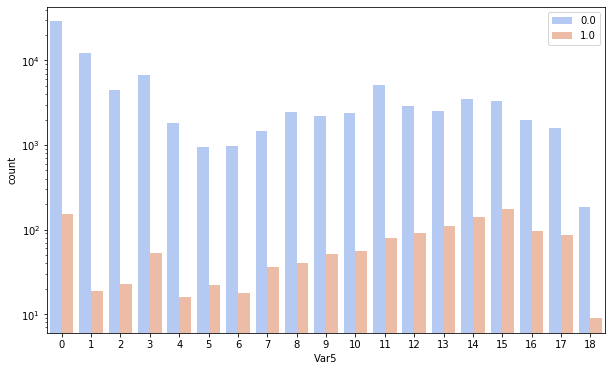

In [107]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Var5", hue="Disbursed", data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc='upper right')

In [108]:
CATEGORICAL_FEATURES.append("Var5")

Variable: **Loan_Amount_Submitted**

In [109]:
data['Loan_Amount_Submitted'].isna().sum()

49535

In case of missing about 40% values, there in necessity for creating new feature informing abount missing data. 

In [110]:
data['Missing_Loan_Amount_Submitted'] = data.Loan_Amount_Submitted.isna()

In [111]:
CATEGORICAL_FEATURES.append('Missing_Loan_Amount_Submitted')

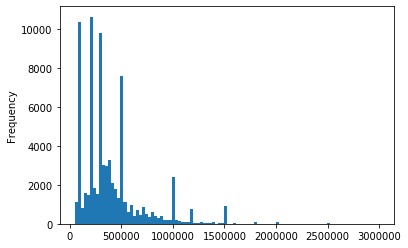

In [112]:
data['Loan_Amount_Submitted'].plot.hist(bins=100)

The distribution is skewed, so we can apply log transform in order to normalize data.  

In [113]:
data['Loan_Amount_Submitted'] = np.log10(data['Loan_Amount_Submitted'] + 1)

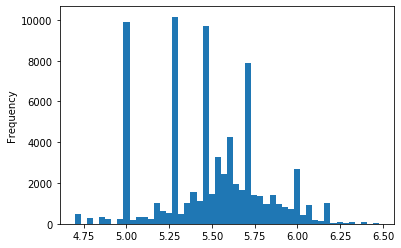

In [114]:
data['Loan_Amount_Submitted'].plot.hist(bins=50)

Next, we may estimate mean and std of created seminormal distribution for filling missing values. 

In [115]:
data['Loan_Amount_Submitted'].fillna(
    pd.Series(
        [np.random.normal(loc=data.Loan_Amount_Submitted.mean(), 
                          scale=data.Loan_Amount_Submitted.std()) 
         for x in range(len(data))]
    ),
    inplace=True
)

Variable: **Loan_Tenure_Submitted**

In [116]:
data['Loan_Tenure_Submitted'].isna().sum()

49535

We apply the same strategy as with **Loan_Amount_Submitted**.

In [117]:
data['Loan_Tenure_Submitted'].value_counts()

5.0    29803
4.0    21820
3.0    12734
2.0     7580
1.0     3259
6.0        6
Name: Loan_Tenure_Submitted, dtype: int64

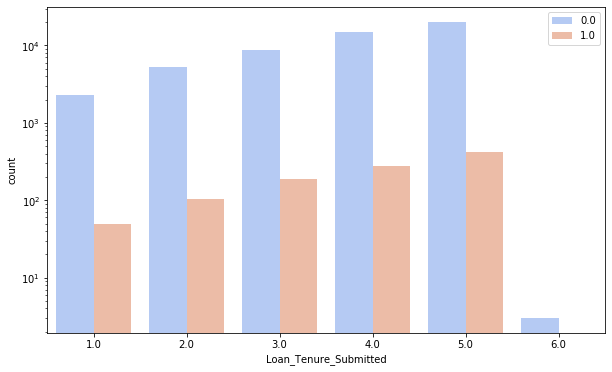

In [118]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Loan_Tenure_Submitted", hue="Disbursed", data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc='upper right')

In [119]:
data['Missing_Loan_Tenure_Submitted'] = data.Loan_Tenure_Submitted.isna()

In [120]:
CATEGORICAL_FEATURES.append('Missing_Loan_Tenure_Submitted')

In [121]:
mask = data['Loan_Tenure_Submitted'].isnull()
samples = random.choices(data['Loan_Tenure_Submitted'][~mask].values , k=mask.sum())
data.loc[mask, 'Loan_Tenure_Submitted'] = samples

In [122]:
CATEGORICAL_FEATURES.append('Loan_Tenure_Submitted')

Variable: **Interest_Rate**

In [123]:
data['Interest_Rate'].isna().sum()

84901

With such a high missing values ratio (more than a half), we can apply the same strategy as with **Loan_Amount_Submitted**.

In [124]:
data['Missing_Interest_Rate'] = data.Loan_Amount_Submitted.isna()

In [125]:
CATEGORICAL_FEATURES.append('Missing_Interest_Rate')

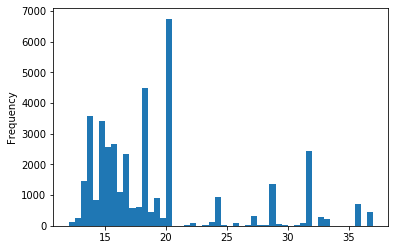

In [126]:
data['Interest_Rate'].plot.hist(bins=50)

In [127]:
mask = data['Interest_Rate'].isnull()
samples = random.choices(data['Interest_Rate'][~mask].values , k=mask.sum())
data.loc[mask, 'Interest_Rate'] = samples

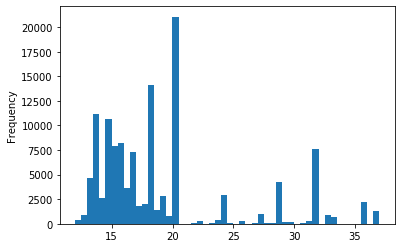

In [128]:
data['Interest_Rate'].plot.hist(bins=50)

Variable: **Processing_Fee**

In [129]:
data['Processing_Fee'].isna().sum()

85346

In [130]:
data['Missing_Processing_Fee'] = data.Processing_Fee.isna()

In [131]:
CATEGORICAL_FEATURES.append('Missing_Processing_Fee')

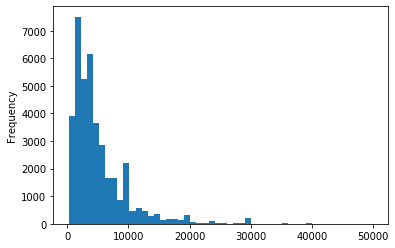

In [132]:
data['Processing_Fee'].plot.hist(bins=50)

In [133]:
data['Processing_Fee'] = np.log10(data['Processing_Fee'] + 1)

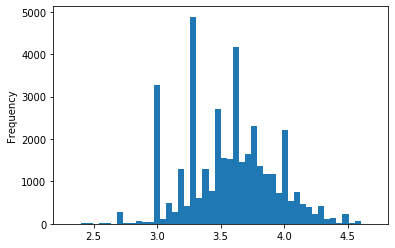

In [134]:
data['Processing_Fee'].plot.hist(bins=50)

We can estimate mean and std of created seminormal distribution for filling missing values. 

In [135]:
data['Processing_Fee'].fillna(
    pd.Series(
        [np.random.normal(loc=data.Processing_Fee.mean(), 
                          scale=data.Processing_Fee.std()) 
         for x in range(len(data))]
    ),
    inplace=True
)

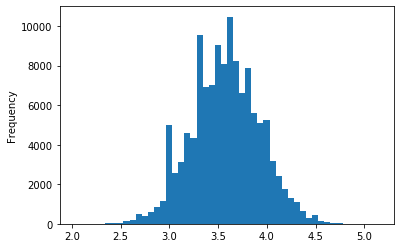

In [136]:
data['Processing_Fee'].plot.hist(bins=50)

Variable: **EMI_Loan_Submitted**

In [137]:
data['EMI_Loan_Submitted'].isna().sum()

84901

In [138]:
data['Missing_EMI_Loan_Submitted'] = data.EMI_Loan_Submitted.isna()

In [139]:
CATEGORICAL_FEATURES.append('Missing_EMI_Loan_Submitted')

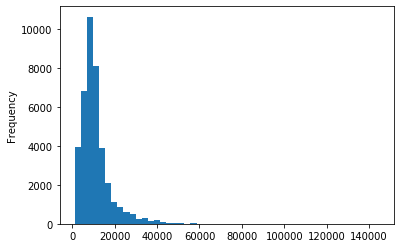

In [140]:
data['EMI_Loan_Submitted'].plot.hist(bins=50)

In [141]:
data['EMI_Loan_Submitted'] = np.log10(data['EMI_Loan_Submitted'] + 1)

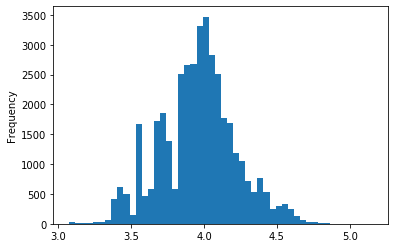

In [142]:
data['EMI_Loan_Submitted'].plot.hist(bins=50)

In [143]:
data['EMI_Loan_Submitted'].fillna(
    pd.Series(
        [np.random.normal(loc=data.EMI_Loan_Submitted.mean(), 
                          scale=data.EMI_Loan_Submitted.std()) 
         for x in range(len(data))]
    ),
    inplace=True
)

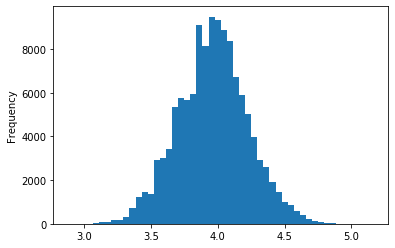

In [144]:
data['EMI_Loan_Submitted'].plot.hist(bins=50)

Variable: **Filled_Form**

In [145]:
data['Filled_Form'].isna().sum()

0

In [146]:
data['Filled_Form'].value_counts()

N    96740
Y    27997
Name: Filled_Form, dtype: int64

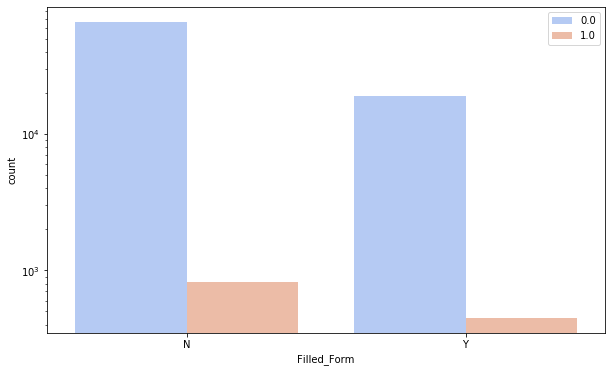

In [147]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Filled_Form", hue="Disbursed", data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc='upper right')

In [148]:
CATEGORICAL_FEATURES.append('Filled_Form')

Variable: **Device_Type**

In [149]:
data['Device_Type'].isna().sum()

0

In [150]:
data['Device_Type'].value_counts()

Web-browser    92105
Mobile         32632
Name: Device_Type, dtype: int64

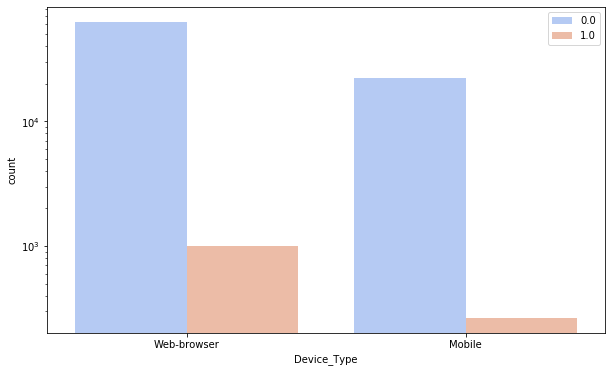

In [151]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Device_Type", hue="Disbursed", data=data, palette='coolwarm')
plt.yscale('log')
plt.legend(loc='upper right')

In [152]:
CATEGORICAL_FEATURES.append('Device_Type')

Variable: **Source**

In [153]:
data['Source'].isna().sum()

0

In [154]:
data['Source'].value_counts()

S122    55249
S133    42900
S159     7999
S143     6140
S127     2804
S137     2450
S134     1900
S161     1109
S151     1018
S157      929
S153      705
S144      447
S156      432
S158      294
S123      112
S141       83
S162       60
S124       43
S150       19
S160       11
S155        5
S136        5
S138        5
S139        4
S129        4
S135        2
S126        1
S131        1
S140        1
S132        1
S125        1
S142        1
S154        1
S130        1
Name: Source, dtype: int64

In [155]:
source_means = data_train.groupby('Source')['Disbursed'].mean()

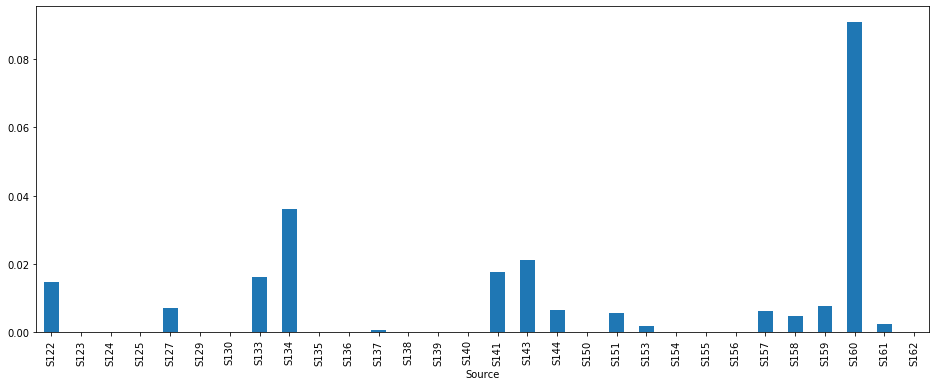

In [156]:
source_means.plot.bar(figsize=(16, 6))

In [157]:
mapping_dict = dict(pd.cut(source_means[(source_means.index != 'S122') & 
                                        (source_means.index != 'S123')], 5, labels=range(5)))

In [158]:
def convert_source(source):
    if source in mapping_dict.keys():
        return mapping_dict[source]
    elif source in ['S122', 'S123']:
        return source
    else:
        return "Other"
    
data["Source"] = data.Source.apply(convert_account)

In [159]:
CATEGORICAL_FEATURES.append('Source')

In [160]:
data.isna().sum()

Gender                               0
City                                 0
Monthly_Income                       0
Loan_Amount_Applied                  0
Loan_Tenure_Applied                  0
Existing_EMI                         0
Employer_Name                        0
Salary_Account                       0
Mobile_Verified                      0
Var5                                 0
Var1                                 0
Loan_Amount_Submitted                0
Loan_Tenure_Submitted                0
Interest_Rate                        0
Processing_Fee                       0
EMI_Loan_Submitted                   0
Filled_Form                          0
Device_Type                          0
Var2                                 0
Source                               0
Var4                                 0
Disbursed                        37717
Monthly_Income_Log                   0
Age                                  0
Lead_Creation_Month                  0
Missing_Loan_Amount_Appli

## 3. Dataset preparation and train-test split

Finally, we need to convert all categorical features into dummy variables, scale continous variables and split dataset (with stratified fashion) into train and test subsets. 

In [161]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

continous_features = data.drop(CATEGORICAL_FEATURES, axis=1).columns.tolist()

col_transformer = ColumnTransformer([
        ('scaler', StandardScaler(), continous_features)
    ], remainder='passthrough')

In [162]:
continous_features

['Monthly_Income',
 'Loan_Amount_Applied',
 'Loan_Tenure_Applied',
 'Existing_EMI',
 'Loan_Amount_Submitted',
 'Interest_Rate',
 'Processing_Fee',
 'EMI_Loan_Submitted',
 'Disbursed',
 'Monthly_Income_Log',
 'Age']

In [163]:
continous_features.remove('Disbursed')

In [164]:
continous_features

['Monthly_Income',
 'Loan_Amount_Applied',
 'Loan_Tenure_Applied',
 'Existing_EMI',
 'Loan_Amount_Submitted',
 'Interest_Rate',
 'Processing_Fee',
 'EMI_Loan_Submitted',
 'Monthly_Income_Log',
 'Age']

In [165]:
data = pd.get_dummies(data=data, columns=CATEGORICAL_FEATURES, drop_first=True)

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124737 entries, 0 to 37716
Data columns (total 97 columns):
Monthly_Income                        124737 non-null int64
Loan_Amount_Applied                   124737 non-null float64
Loan_Tenure_Applied                   124737 non-null float64
Existing_EMI                          124737 non-null float64
Loan_Amount_Submitted                 124737 non-null float64
Interest_Rate                         124737 non-null float64
Processing_Fee                        124737 non-null float64
EMI_Loan_Submitted                    124737 non-null float64
Disbursed                             87020 non-null float64
Monthly_Income_Log                    124737 non-null float64
Age                                   124737 non-null int64
Gender_Male                           124737 non-null uint8
City_Bengaluru                        124737 non-null uint8
City_Chandigarh                       124737 non-null uint8
City_Chennai                     

In [167]:
X_all = col_transformer.fit_transform(data.drop('Disbursed', inplace=False, axis=1))
y_all = data['Disbursed'].values

In [168]:
X = X_all[:data_train.shape[0], :]
y = y_all[:data_train.shape[0]]

X_off = X_all[data_train.shape[0]:, :]

In [251]:
X.shape

(87020, 96)

In [252]:
y.shape

(87020,)

In [253]:
np.save('X_hcb.npy', X)

In [254]:
np.save('y_hcb.npy', y)